# Pràctica 5: SVM


## *Anem a veure una petita introducció més visual del que fa un SVM*

(-0.4444190487631618, 3.5036737336332937)

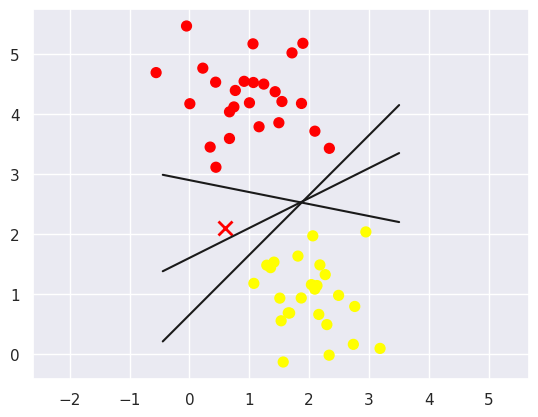

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(X[:,0].min()*0.8, X[:,0].max()*1.1)
plt.scatter(X[:, 0], X[:, 1],  c=y*0.15, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.axis('equal')
plt.xlim(xfit[0], xfit[-1])


(-0.4444190487631618, 3.5036737336332937)

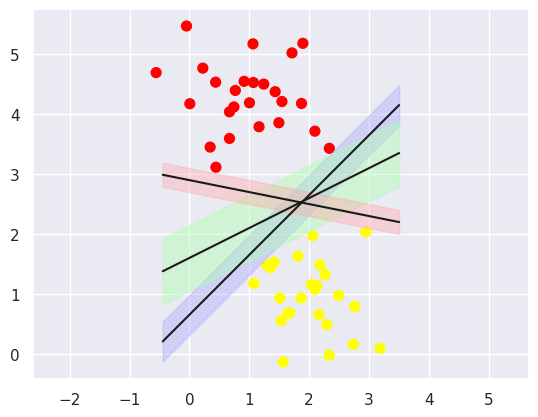

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d, c in [(1, 0.65, 0.33, '#AAAAFF'), (0.5, 1.6, 0.55, '#AAFFAA'), (-0.2, 2.9, 0.2, '#FFAAAA')]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color=c, alpha=0.4)

plt.axis('equal')   
plt.xlim(xfit[0], xfit[-1])  

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=250, linewidth=1, edgecolors='k', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [5]:
from sklearn.svm import SVC # "Support vector classifier"
y2 = y*1
#y2[10] = 1- y2[10]
model = SVC(kernel='linear', C=1E0)
model.fit(X, y2)

SVC(kernel='linear')

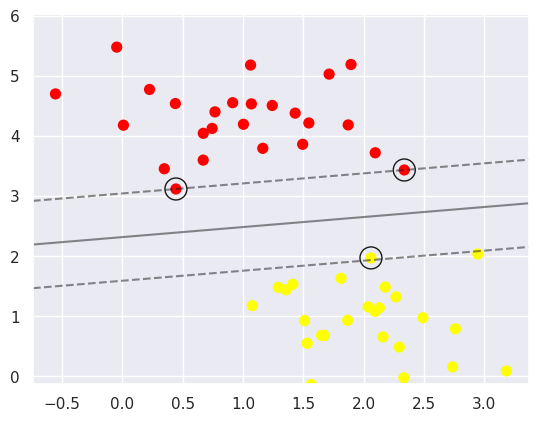

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y2, s=50, cmap='autumn')
plt.ylim(X[:,1].min()*0.9, X[:,1].max()*1.1,)    
plot_svc_decision_function(model);

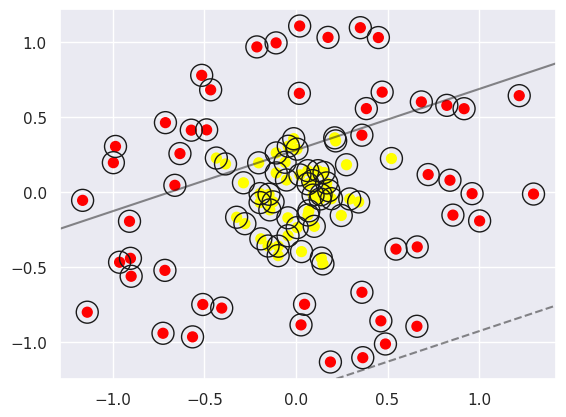

In [7]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.20)

## QUe passa si canviem el kernel?????
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True);

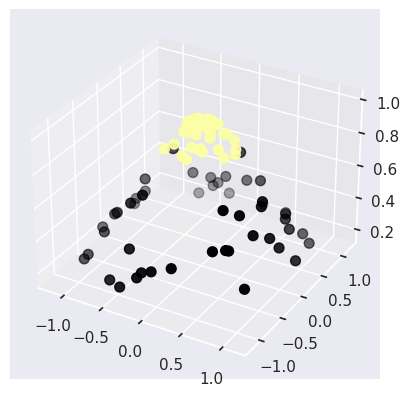

In [80]:
#troba la x y i z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x= , y= , z= , c=y, s=50, cmap='inferno')
plt.show()

### Dataset
Per aquesta pràctica hem decidit treballar amb una base de dades de imatges. Es tracta de [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). És similar a la base de dades de MNIST, un dataset clàssic en la visió per computador. Són imatges de 28x28 pixels i en escala de grisos. El original disposa de 60.000 imatges de entrenament i 10.000 de test. Està anotat en 10 categories diferents:

![image.png](image.png)

|Id|Nom|
|:-:|:--|
|0|T-shirt/top 
|1|Trouser |
|2|Pullover| 
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag |
|9|Ankle boot|


Ens hem descarregat el csv desde: https://www.kaggle.com/zalando-research/fashionmnist.

Els hem simplificat i dividit en altres csv més petits. Tenim els originals, i llavors un subsampling (100 vegades més petit). Dels petits, a més, també tenim el cas binari.

| nom | set | # exemples | # categories |
|:--|:-:|:-:|:-:|
|fashion-mnist_train_small_binary.csv   |train|     600 |  2 |
|fashion-mnist_test_small_binary.csv    |test |     100 |  2 |
|fashion-mnist_train_small.csv          |train|     600 | 10 |
|fashion-mnist_test_small.csv           |test |     100 | 10 |
|fashion-mnist_train.csv                |train|  60.000 | 10 |
|fashion-mnist_test.csv                 |test |  10.000 | 10 |

Les dues originals, les podeu *descarregar* del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.


In [8]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path, shuffle=False):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    if shuffle:
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('fashion-mnist_train_medium.csv')
y_train = dataset["label"]
X_train = dataset.drop("label", axis="columns")


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6000, 785)


## *Objectiu*

L'objectiu d'aquesta pràctica és familiaritzar-se amb el modul de [SVM de sklearn](https://scikit-learn.org/stable/modules/svm.html).

En aquest apartat només farem servir les dades **fashion-mnist_train_small_binary.csv**	i **fashion-mnist_train_small.csv**



Bàsicament tenim a dos models: el [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) i el [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

#### SVC

El model SVC está implementat a través de libsvm. El temps d'entrenament escala almenys **quadràticament** amb el número de exemples.

A més, el multiclass s'implementa amb la estratègia One-Vs-One (OVO).

Tot i així, ens permet fer servir varis **kernels**: 
* ‘linear’
* ‘poly’ 
* ‘rbf’ (default)
* ‘sigmoid’ 
* ‘precomputed’ 

Mireu quins parametres apliquen a cada un dels kernels a la seva [documentació](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

*EL FAREM SERVIR QUAN TENIM **POCS EXEMPLES**, O MOLT DE TEMPS..*

#### LinearSVC

El model SVC está implementat a través de liblinear. Hauria de permetre treballar amb més dades (escala molt millor amb el número d'exemples).

A més, el multiclass s'implementa amb la estratègia One-Vs-Rest (OVR)

*EL FAREM SERVIR QUAN TENIM **MOLTS EXEMPLES** i el temps de SVC es intractable*




Recordeu el que significa One-Vs-One (OVO) i One-Vs-Rest (OVR)

![OvA_OvO.png](CH06_FIG_8_MLR.png)


És importnat avaluar les diferents alternatives disponibles per resoldre els problemes que abordem: [comparativa](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

Exemple de SVC:

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC

clf = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))
clf.fit(X_train, y_train)

/home/cboned/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=10000))])

In [10]:
y_train_pred = clf.predict(X_train)
y_train_scr = clf.decision_function(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"The accuracy on training is {accuracy_train:.5f}")
np.set_printoptions(linewidth=np.inf)
print(np.c_[y_train_scr[:10,:],y_train_pred[:10]])

The accuracy on training is 0.98400
[[ -1.51635106  -1.78338402   0.85308239  -4.14079178  -6.0838041   -6.79820077  -3.29705987 -13.55940545  -2.4247797   -3.8280032    2.        ]
 [ -8.88867182  -1.95411441  -3.94018594  -3.86065913 -10.09580395  -2.24744085  -6.93419512  -0.90873114  -1.05448038   0.89838943   9.        ]
 [ -7.65527019  -2.97837865  -4.43455774  -5.50103434  -0.80895038  -5.60259557   1.14537325  -9.58907088  -2.10147819  -3.43389635   6.        ]
 [  6.74269538  -2.78092104  -0.89629122  -5.46828949  -3.04108451 -10.86770026  -6.15644151  -3.012827    -1.01072821  -1.6267457    0.        ]
 [ -5.62499929  -4.16870853  -4.24374005   4.23944328  -4.20090268  -6.36727899  -1.77274134  -4.83356025  -4.28461226  -5.71442665   3.        ]
 [ -9.87254738  -3.80433105  -2.20440978 -12.24951591   0.97762106  -3.89680016  -0.19750245  -5.8299399   -2.02703668  -3.35582088   4.        ]
 [ -5.7797414   -3.02581772  -3.07205058  -3.81818555   3.40427223  -7.30388708  -4.0514

### Preguntes

Bassant-se en les pràctiques de mètriques i de la regressió logística (ús de mètriques, cerca d'hiperparàmetres, Cross validation) realitza i compara.

Els vostres anàlisi i conclusions han d'estar bassades en evidències numèriques i gràfiques de: ROC, Confusion Matrix, PR, Curves d'aprenentatge (loss, accuracy) el considereu. 

En la cerca d'hiperparàmetres com que el mètode és més lent i si ficau moltes convinacions el temps serà molt gran. Per tant  hi ha una altra opció que és utilitzar una búsqueda Aleatoria del valors, i esperar a trobar la millor solució. D'això se'n diu [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). En aquest cas, pots definir el **n_iter** que vols que provi. Es a dir, si dius que n_iter=10, farà 10 proves amb diferents valors dels hiperparametres.


#### binary classification
1. Entrena un model SVC **binary** (nomès dues categories) amb les dades **fashion-mnist_train_small_binary.csv**. Comprova el error de predicció sobre el conjunt d'entrenament. 
2. Quin model has fet servir per defecte? Amb quina C? Podries millorar el error de entrenament fàcilment (imagina que nomès tens 2 intents). Què modificaries)?
3. Explica què son els atributs clf.support_vectors_ i el clf.n_support_
4. Entrena un model LinearSVC sobre les mateixes dades. Quin accuracy de train obtens? És més ràpid? 
5. Saps on han anat els atributs clf.support_vectors_ i el clf.n_support_ en el cas del LinearSVC? Tenen alguna relació amb el clf.coef_ i clf.intercept_? [Pista](https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html)

#### multiclass classification
6. Entrena un model SVC multicategoria amb les dades **fashion-mnist_train_small.csv**
7. Entrena un model LinearSVC multicategoria. Quin accuracy de train obtens?

#### selecció de mètode
8. Compara els resultats obtinguts amb els altres mètodes de classificació que coneixes
 